 # Introduction to Computer Vision - Fall 2025

#ِ Assignment 2

**Grading Criteria:**

Task1: 30%

Task2: 35%

Task3: 35%


**Notes**

Non working code is 0 - no matter what is writtern in the code

Student must solve the question using the required method mentioned in that question. For example, if the question asks to use "connected components" and the student solved it with another method he/she will get 0 for that question.

----------
Code should be well documented (explain your logic)

Plagiarism in code -> 0

AI generated code -> 0

Late submission 5% per day

Submit your completed Colab notebook.



download images

In [1]:
# All plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# Set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# Remove grid lines
import numpy as np
import time
import cv2
import math

!wget "https://drive.google.com/uc?export=download&id=1PwD1z2-6g09UdnYg5gDCT_KuoJVLEIJ6" -O cnt_img.jpg
!wget "https://drive.google.com/uc?export=download&id=1Fye6-JjZjibczcqZ2cDT4o5gElUxFvIU" -O scene.jpg
!wget "https://drive.google.com/uc?export=download&id=1CSI5FFyfFoXzM86v-Z0n2h3CsyGzpHSU" -O book.jpg
!wget "https://drive.google.com/uc?export=download&id=1rjNwi4q7RNmoRm175diQyvciHDoCrMPv" -O final_template.jpg
!wget "https://drive.google.com/uc?export=download&id=1V71Pr8lcT8KPW7aZecBpFoyROsUK9y7F" -O classes.jpg
!wget "https://drive.google.com/uc?export=download&id=19kwYwa1Rm-BNkKHwuJle4Rx7zB-23mE9" -O blocks.jpg
!wget "https://drive.google.com/uc?export=download&id=1AIPZKJa-mZPAcMGPF-d5AqEHx2GkvGji" -O blocks_labeld.jpg

--2025-10-01 20:58:21--  https://drive.google.com/uc?export=download&id=1PwD1z2-6g09UdnYg5gDCT_KuoJVLEIJ6
Resolving drive.google.com (drive.google.com)... 74.125.203.113, 74.125.203.101, 74.125.203.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PwD1z2-6g09UdnYg5gDCT_KuoJVLEIJ6&export=download [following]
--2025-10-01 20:58:21--  https://drive.usercontent.google.com/download?id=1PwD1z2-6g09UdnYg5gDCT_KuoJVLEIJ6&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50541 (49K) [image/jpeg]
Saving to: ‘cnt_img.jpg’

cnt_img.jpg         100%[===================>]  49.36K  --.-KB/s    in 0s      

202

Helper functions - it is optional to use them

In [2]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return img_result

def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])

    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

# function for colors arrat generation
def generate_colors(num):
  r = lambda: np.random.randint(0,255)
  return [(r(),r(),r()) for _ in range(num)]

### Task 1: Template Matching

Detect the location of the template (book.jpg) within the scene (scene.jpg)
you should solve the problem only with the method `cv2.matchTemplate`

use interactive interface to select the best method



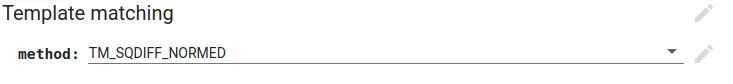

The output should be like follow:

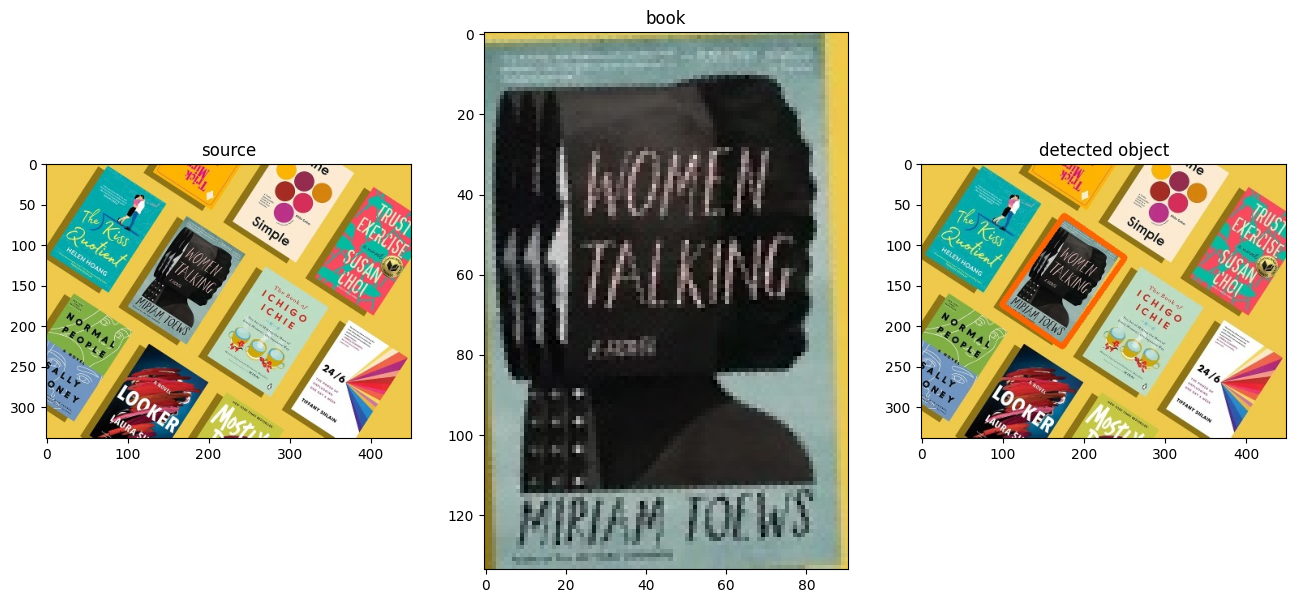

In [3]:
# DO NOT change these codes
scene = cv2.imread("scene.jpg")
scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
book = cv2.imread("book.jpg")
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
final = cv2.imread("final_template.jpg")
final = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
showInRow([scene, book, final],["source",  "book", "detected object"])

### Solution

Dropdown(description='Matching Method:', layout=Layout(width='70%'), options=(('TM_CCOEFF', 0), ('TM_CCOEFF_NO…

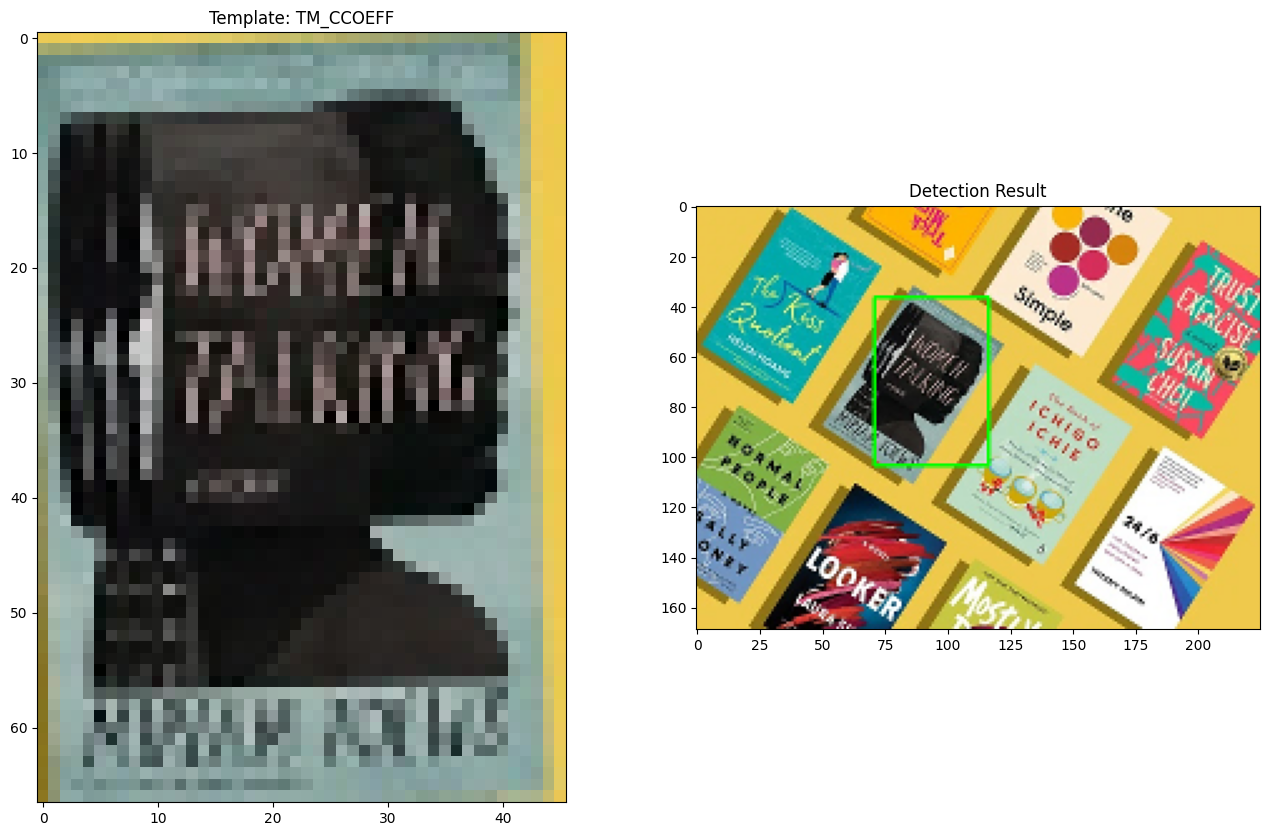

TM_CCORR and TM_CCORR_NORMED perform bad in this example, these methods are sensitive to overall brightness and contrast differences while other methods use normalized calculations or mean-adjusted comparisons that are invariant to lighting and contrast differences.


In [10]:
# write your code here
""" write code to create the required interactive interface """
""" weight 5% """

""" describe your code steps with comments """
""" weight 10% """

""" the main code """
""" weight 15% """

import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets

SCENE_IMAGE = "scene.jpg"
TEMPLATE_IMAGE = "book.jpg"  # Object we're trying to find in the scene

# Step 1: Load images
scene_color = cv2.imread(SCENE_IMAGE, cv2.IMREAD_COLOR)
template_color = cv2.imread(TEMPLATE_IMAGE, cv2.IMREAD_UNCHANGED)

def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Convert color images to grayscale
scene_grayscale = convert_to_grayscale(scene_color)
template_grayscale = convert_to_grayscale(template_color)

# Step 3: Get template dimensions for drawing rectangles later
template_height, template_width = template_grayscale.shape[:2]

# template matching methods
matching_methods = [
    ("TM_CCOEFF", cv2.TM_CCOEFF),
    ("TM_CCOEFF_NORMED", cv2.TM_CCOEFF_NORMED),
    ("TM_CCORR", cv2.TM_CCORR),
    ("TM_CCORR_NORMED", cv2.TM_CCORR_NORMED),
    ("TM_SQDIFF", cv2.TM_SQDIFF),
    ("TM_SQDIFF_NORMED", cv2.TM_SQDIFF_NORMED),
]

# Extract just the method names for the dropdown menu
method_labels = [method[0] for method in matching_methods]

def run_template_matching(selected_method_index):
    # Get method name and OpenCV constant from our methods list
    method_name, method_code = matching_methods[selected_method_index]

    # Step 4: Perform template matching
    match_result = cv2.matchTemplate(scene_grayscale, template_grayscale, method_code)

    # Find the best match location in the result map
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match_result)

    # Different methods use different optimal values (min vs max)
    if method_code in (cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED):
        best_match_location = min_loc  # For difference methods, lower is better
    else:
        best_match_location = max_loc  # For correlation methods, higher is better


    # Step 5: Calculate rectangle coordinates around matched area
    top_left = best_match_location
    bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

    # Draw green rectangle on a copy of the original color scene
    result_with_box = scene_color.copy()
    cv2.rectangle(result_with_box, top_left, bottom_right, (0, 255, 0), 2)  # Green rectangle, 2px thick

    # Convert BGR to RGB for proper color display in matplotlib
    result_rgb = cv2.cvtColor(result_with_box, cv2.COLOR_BGR2RGB)

    # Prepare images for display at 50% scale
    template_display = read_and_resize(TEMPLATE_IMAGE, grayscale=False, fx=0.5, fy=0.5)
    result_display = cv2.resize(result_rgb, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

    # Clear previous output and show updated results
    clear_output(wait=True)
    display(method_selector)
    showInRow(
        [template_display, result_display],
        [f"Template: {method_name}", "Detection Result"],
        disable_ticks=False
    )

def handle_method_change(change):
    if change['name'] == 'value':
        run_template_matching(change['new'])

# Create dropdown widget for method selection
method_selector = widgets.Dropdown(
    options=[(label, index) for index, label in enumerate(method_labels)],
    description='Matching Method:',
    value=0,
    layout=widgets.Layout(width='70%')
)

# Connect the dropdown change event to our handler function
method_selector.observe(handle_method_change, names='value')

# Initial display - show widget and run with default method
display(method_selector)
run_template_matching(method_selector.value)

print ("TM_CCORR and TM_CCORR_NORMED perform bad in this example, these methods are sensitive to overall brightness and contrast differences while other methods use normalized calculations or mean-adjusted comparisons that are invariant to lighting and contrast differences.")

## Task3: Classify objects using Contour features

for the following image, extract the numbre of the object, the contour of each object, then classify the objects based on their shapes and write the class number on each object as follows

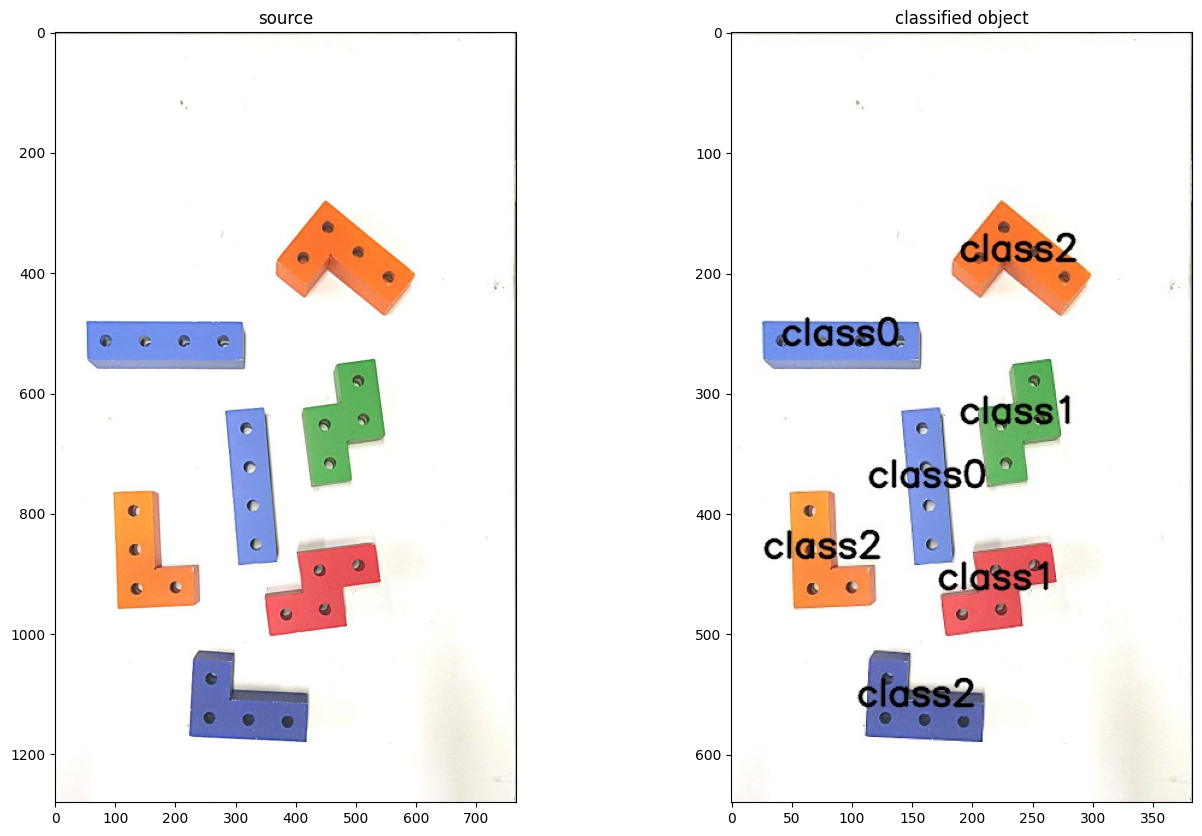

In [5]:
# DO NOT change these codes
cnt_img = cv2.imread("cnt_img.jpg")
cnt_img = cv2.cvtColor(cnt_img, cv2.COLOR_BGR2RGB)
classes = cv2.imread("classes.jpg")
classes = cv2.cvtColor(classes, cv2.COLOR_BGR2RGB)
showInRow([cnt_img, classes],["source", "classified object"])

### Solution

Found 7 objects


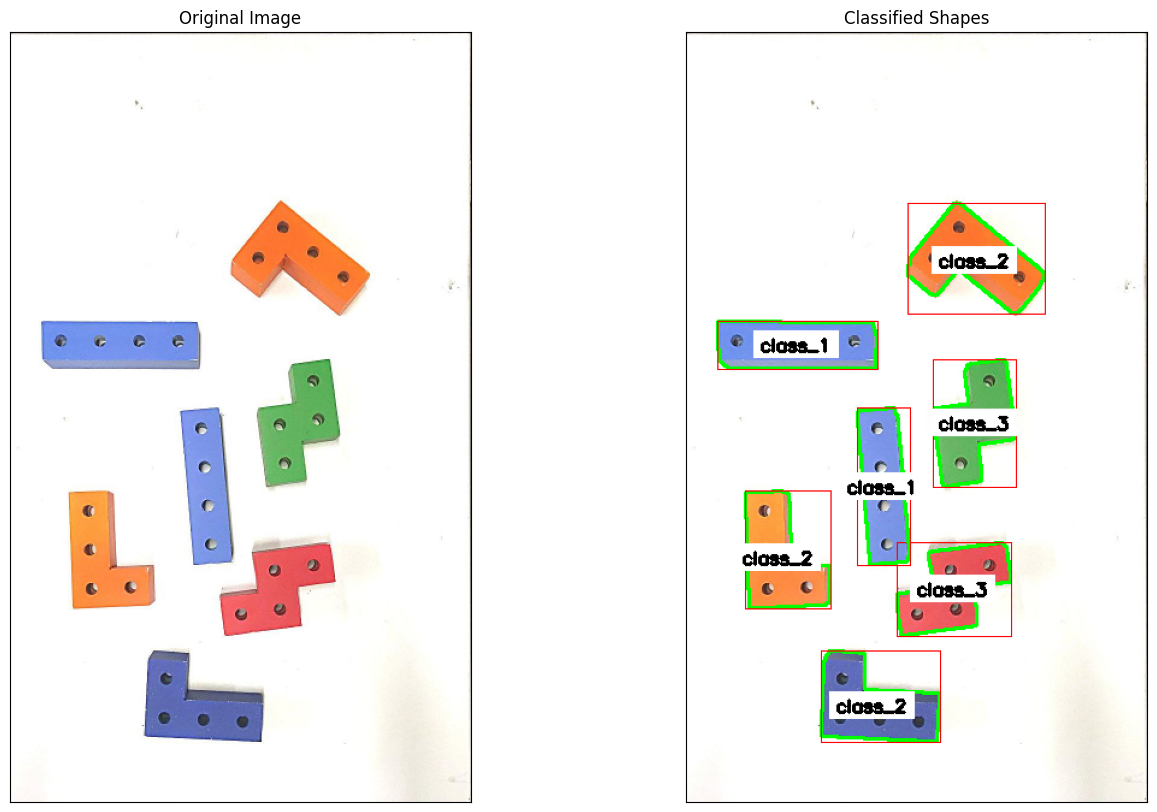

In [6]:
# write your code here
""" describe your code steps with comments """
""" weight 5% """

""" extract the correct number of the objects and get their contours """
""" weight 10% """

""" extract the correct number of the objects and get their contours """
""" weight 20% """

import cv2
import numpy as np
import matplotlib.pyplot as plt


# Main processing function
def process_and_classify_shapes(input_image):
    """
    Processes an image to detect, classify, and annotate shapes.
    Returns:
        original: Original resized image
        annotated: Image with shapes annotated and classified
        object_count: Number of objects detected
    """

    # STEP 1: Load and prepare the image
    # Read and resize the original image to 50% of original size
    img_original = read_and_resize(input_image, grayscale=False, fx=0.5, fy=0.5)

    # STEP 2: Convert to grayscale for processing
    # Color information isn't needed for shape detection
    img_gray = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)

    # STEP 3: Create binary image (black and white)
    # Use Otsu's thresholding to automatically find optimal threshold value
    # THRESH_BINARY_INV makes objects white and background black
    _, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # STEP 4: Clean up the binary image
    # Create a 5x5 pixel kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)
    # MORPH_OPEN removes small noise (erosion followed by dilation)
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    # MORPH_CLOSE fills small holes (dilation followed by erosion)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)

    # STEP 5: Find contours (outlines of shapes)
    # RETR_EXTERNAL retrieves only the outermost contours
    # CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # STEP 6: Filter out small contours (noise)
    min_area = 500  # Minimum area in pixels to be considered a real object
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    print(f"Found {len(filtered_contours)} objects")

    # STEP 7: Create a copy of original image for annotations
    img_annotated = img_original.copy()

    # STEP 8: Process each detected contour
    for i, cnt in enumerate(filtered_contours):
        # Get the bounding rectangle around the contour
        x, y, w, h = cv2.boundingRect(cnt)
        # Calculate aspect ratio (width/height)
        aspect_ratio = w / h if h > 0 else 0

        # STEP 9: Detect convexity defects (concave regions)
        # Find convex hull points (the outermost points)
        hull = cv2.convexHull(cnt, returnPoints=False)
        # Calculate convexity defects (indentations in the shape)
        defects = cv2.convexityDefects(cnt, hull) if hull is not None and len(hull) > 3 else None

        # STEP 10: Count significant convexity defects
        defect_count = 0
        if defects is not None:
            for j in range(defects.shape[0]):
                _, _, _, depth = defects[j, 0]
                # Only count defects deeper than threshold (avoids noise)
                if depth > 1000:
                    defect_count += 1

        # STEP 11: Classify the shape based on features
        if defect_count >= 2:
            class_id = 3  # S or zigzag shape (multiple concavities)
        elif defect_count == 1:
            class_id = 2  # L shape (one concavity)
        elif aspect_ratio > 2.0 or aspect_ratio < 0.5:
            class_id = 1  # Long bar (very wide or very tall)
        else:
            class_id = 4  # Compact block (roughly square or rectangle)

        # STEP 12: Draw visual annotations
        # Draw green contour around the shape
        cv2.drawContours(img_annotated, [cnt], -1, (0, 255, 0), 2)
        # Draw blue bounding box
        cv2.rectangle(img_annotated, (x, y), (x + w, y + h), (255, 0, 0), 1)

        # STEP 13: Calculate center point for text label
        M = cv2.moments(cnt)
        if M["m00"] != 0:
            # Use moments to find centroid
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
        else:
            # Fallback: use bounding box center
            cx, cy = x + w // 2, y + h // 2

        # STEP 14: Add classification label
        label = f"class_{class_id}"
        # Get text dimensions for proper positioning
        text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]

        # Draw white background rectangle for text readability
        cv2.rectangle(img_annotated,
                     (cx - text_size[0]//2 - 5, cy - text_size[1]//2 - 5),
                     (cx + text_size[0]//2 + 5, cy + text_size[1]//2 + 5),
                     (255, 255, 255), -1)
        # Draw black text label
        cv2.putText(img_annotated, label,
                   (cx - text_size[0]//2, cy + text_size[1]//2),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    return img_original, img_annotated, len(filtered_contours)

input_image = "cnt_img.jpg"
output_image = "annotated_cnt_img.jpg"

# Process the image: detect and classify shapes
original, annotated, object_count = process_and_classify_shapes(input_image)

# Save the annotated result
# Convert from RGB back to BGR for OpenCV file saving
annotated_bgr = cv2.cvtColor(annotated, cv2.COLOR_RGB2BGR)
cv2.imwrite(output_image, annotated_bgr)

# Display original and annotated images side by side
showInRow([original, annotated],
          titles=['Original Image', 'Classified Shapes'],
          disable_ticks=True)



## Task 4: Count objects in image

Using only connected components to segment the objects in this image

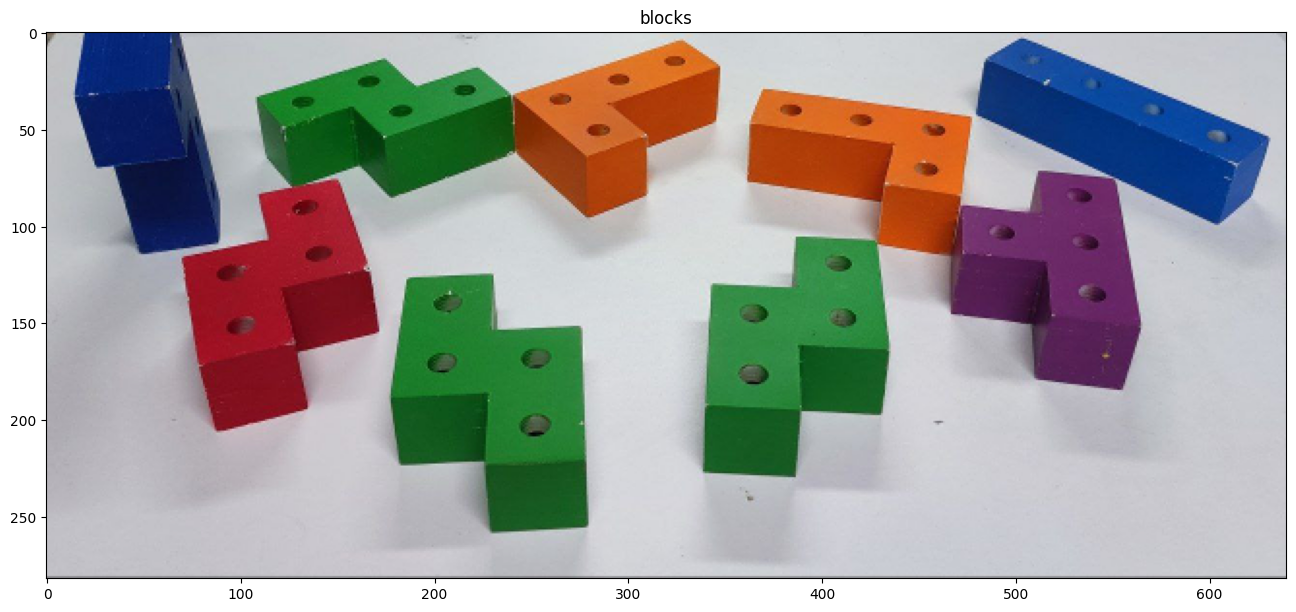

In [7]:
# DO NOT change these codes
blocks = read_and_resize("blocks.jpg")
showInRow([blocks],["blocks"])

The output should be like this

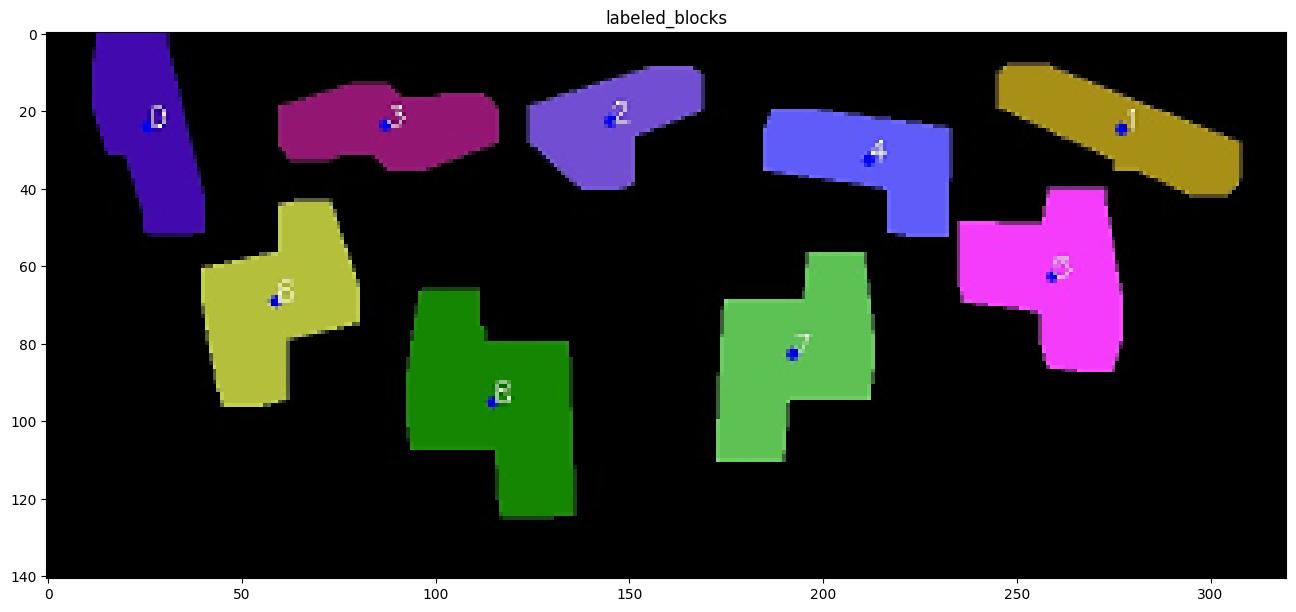

In [8]:
# DO NOT change these codes
labeled_blocks = read_and_resize("blocks_labeld.jpg")
showInRow([labeled_blocks],["labeled_blocks"])

Found 6 color ranges
Total components detected: 9


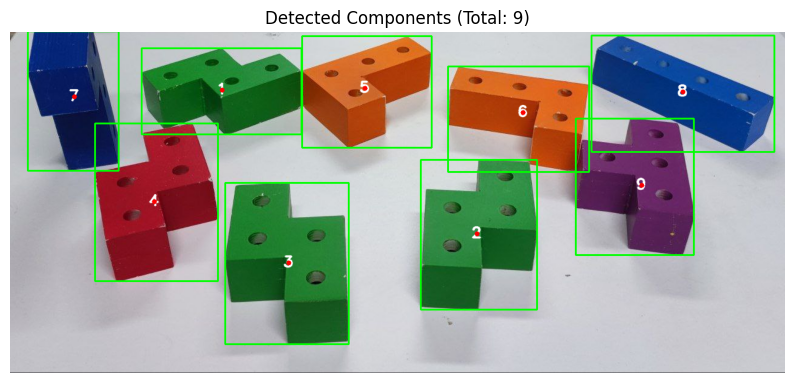

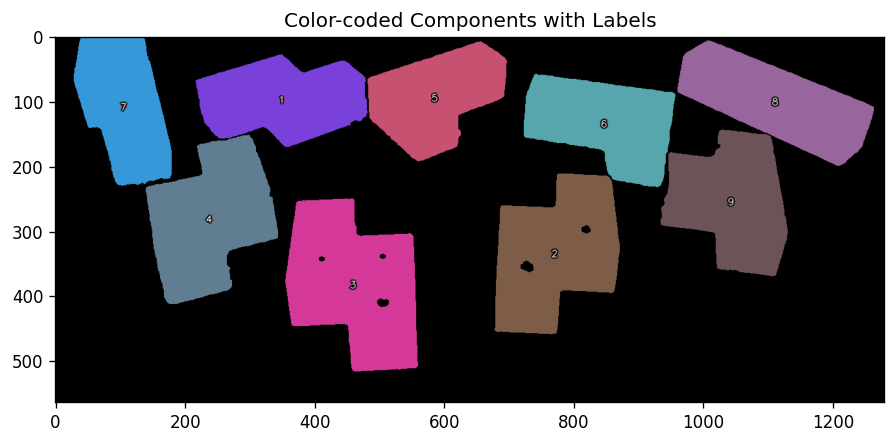

In [9]:
# write your code here
""" describe your code steps with comments """
""" weight 5% """

""" extract the correct number of the objects using connected components """
""" weight 15% """

""" display the image with the labeled objects in different colors as it is shown ablove """
""" weight 15% """

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def detect_color_ranges_from_image(image_path, num_colors=5, hue_range=8, min_saturation=40, min_brightness=40):
    """
    Automatically detects dominant color ranges in an image using HSV color space analysis.
    hue_range: Range around each peak hue to include in color range
    min_saturation: Minimum saturation value to consider a pixel as colored
    min_brightness: Minimum brightness value to consider a pixel as colored
    Returns:
        Dictionary of color ranges in HSV format
    """
    # Load image and convert to HSV color space
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extract HSV channels
    hue_channel = hsv_image[:,:,0]  # Hue values
    saturation_channel = hsv_image[:,:,1]  # Saturation values
    value_channel = hsv_image[:,:,2]  # Brightness values

    # Create mask for colored pixels (ignore dark/desaturated pixels)
    colored_pixels_mask = (saturation_channel > min_saturation) & (value_channel > min_brightness)
    hue_values = hue_channel[colored_pixels_mask].flatten()

    # Build hue histogram
    hue_histogram = np.bincount(hue_values, minlength=180)

    # Find peaks in the hue histogram
    detected_peaks, _ = find_peaks(hue_histogram, distance=5, height=100)

    # Sort peaks by strength and keep top N colors
    strongest_peaks = detected_peaks[np.argsort(hue_histogram[detected_peaks])[::-1]]
    strongest_peaks = strongest_peaks[:num_colors]

    # Generate color ranges around each detected peak
    color_ranges = {}
    for idx, peak_hue in enumerate(strongest_peaks):
        # Calculate lower and upper bounds for this color range
        lower_hue = (peak_hue - hue_range) % 180
        upper_hue = (peak_hue + hue_range) % 180

        # Handle hue wrap-around (red colors at 0/180 boundary)
        if lower_hue <= upper_hue:
            # Normal case - single range
            color_ranges[f"color_{idx}"] = (
                (lower_hue, 50, 40),      # Lower HSV bound
                (upper_hue, 255, 255)     # Upper HSV bound
            )
        else:
            # Wrap-around case - split into two ranges
            color_ranges[f"color_{idx}_a"] = ((lower_hue, 50, 40), (179, 255, 255))
            color_ranges[f"color_{idx}_b"] = ((0, 50, 40), (upper_hue, 255, 255))

    return color_ranges

def analyze_color_components(image_path, color_ranges):
    """
    color_ranges: Dictionary of color ranges from detect_color_ranges_from_image
    Returns:
        tuple: (annotated_image, component_data, visualization_image)
    """
    # Load and prepare image
    original_image = cv2.imread(image_path)
    image_height, image_width = original_image.shape[:2]
    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

    # Create morphological kernel for noise cleaning
    morphology_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

    # Set minimum area threshold for components (0.3% of image area)
    min_component_area = int(image_height * image_width * 0.003)

    # Tracking variables
    used_pixels_mask = np.zeros((image_height, image_width), dtype=np.uint8)
    annotated_image = original_image.copy()
    component_id = 0
    detected_components = []

    # Process each color range
    for color_name, (lower_bound, upper_bound) in color_ranges.items():
        # Convert bounds to numpy arrays
        lower_bound = np.array(lower_bound, dtype=np.uint8)
        upper_bound = np.array(upper_bound, dtype=np.uint8)

        # Create mask for current color range
        color_mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

        # Remove pixels already assigned to previous colors
        color_mask = cv2.bitwise_and(color_mask, cv2.bitwise_not(used_pixels_mask))

        # Clean mask with morphological operations
        color_mask = cv2.morphologyEx(color_mask, cv2.MORPH_CLOSE, morphology_kernel, iterations=2)
        color_mask = cv2.morphologyEx(color_mask, cv2.MORPH_OPEN, morphology_kernel, iterations=1)

        # Find connected components in the mask
        num_labels, label_matrix = cv2.connectedComponents(color_mask, connectivity=8)

        # Process each component
        for label in range(1, num_labels):  # Skip background (label 0)
            # Get pixel coordinates for this component
            y_coords, x_coords = np.where(label_matrix == label)

            if y_coords.size == 0:
                continue

            component_area = y_coords.size

            # Filter out small components
            if component_area < min_component_area:
                continue

            # Calculate component properties
            min_x, max_x = int(x_coords.min()), int(x_coords.max())
            min_y, max_y = int(y_coords.min()), int(y_coords.max())
            bbox = (min_x, min_y, max_x - min_x + 1, max_y - min_y + 1)
            centroid = (int(x_coords.mean()), int(y_coords.mean()))

            component_id += 1

            # Store component data
            component_data = {
                "id": component_id,
                "color": color_name,
                "area": int(component_area),
                "bbox": bbox,
                "centroid": centroid,
                "pixel_coords": (y_coords, x_coords)
            }
            detected_components.append(component_data)

            # Mark these pixels as used
            used_pixels_mask[label_matrix == label] = 255

            # Draw bounding box and annotations
            x, y, w, h = bbox
            center_x, center_y = centroid

            # Draw bounding box
            cv2.rectangle(annotated_image, (x, y), (x + w - 1, y + h - 1), (0, 255, 0), 2)

            # Draw component ID text
            cv2.putText(annotated_image, str(component_id), (center_x - 9, center_y + 6),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

            # Draw centroid point
            cv2.circle(annotated_image, (center_x, center_y), 4, (0, 0, 255), -1)

    # Create visualization with colored components
    visualization = np.zeros((image_height, image_width, 3), dtype=np.uint8)
    np.random.seed(2)  # Consistent colors for visualization

    # Generate random colors for each component
    color_palette = (np.random.randint(50, 220, size=(max(1, len(detected_components)), 3))).tolist()

    # Color each component
    for idx, component in enumerate(detected_components):
        y_coords, x_coords = component["pixel_coords"]
        visualization[y_coords, x_coords] = color_palette[idx]

    # Add centroid markers and labels to visualization
    for component in detected_components:
        center_x, center_y = component["centroid"]
        component_id = component["id"]

        # Draw centroid
        cv2.circle(visualization, (center_x, center_y), 4, (0, 0, 255), -1)

        # Draw component ID with outline for visibility
        cv2.putText(visualization, str(component_id), (center_x - 6, center_y + 6),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 3, cv2.LINE_AA)
        cv2.putText(visualization, str(component_id), (center_x - 6, center_y + 6),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    return annotated_image, detected_components, visualization

input_image_path = "blocks.jpg"

# Step 1: Detect dominant color ranges in the image
detected_colors = detect_color_ranges_from_image(input_image_path, num_colors=5)
print(f"Found {len(detected_colors)} color ranges")

# Step 2: Analyze components for each color range
result_image, components, component_visualization = analyze_color_components(input_image_path, detected_colors)

# Step 3: Display results
print(f"Total components detected: {len(components)}")

# Display annotated image with bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Detected Components (Total: {len(components)})")
plt.show()

# Display component visualization
plt.figure(figsize=(9.8, 3.8), dpi=120)
plt.imshow(cv2.cvtColor(component_visualization, cv2.COLOR_BGR2RGB))
plt.title("Color-coded Components with Labels")
plt.axis('on')
plt.tight_layout()
plt.show()